# Stellar Mass Table distribution fit
*Parse table from csv file*

In [15]:
from pandas import read_csv


df = read_csv('stellar_orbital_eccentricity.csv')
df.head()

,eccentricity,p
0,0.95,0.00463
1,0.90,0.01389
2,0.80,0.02778
3,0.70,0.11574
4,0.60,0.21296


## Discrete probabilities
*the p column contains probability of the dice rolls corresponding to the eccentricities*

In [16]:
x = df.eccentricity
y = df.p
df.p.sum()

1.0

*creating random sample of 1000 elements from given probabilities*

In [17]:
from random import choices

sample = choices(list(x), weights=list(y), k=10000)

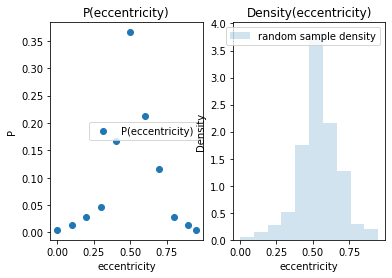

In [18]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x, y, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample, density=True, histtype='stepfilled', alpha=0.2, label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()
plt.show()

## Continuous random variable fit
*Fitting a truncated normal distribution to the random sample*

In [32]:

import numpy as np

xa, xb = x.min(), x.max()
mu = x.mean()
sigma = x.std() ** 2
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma 

(-4.70842332613391, 4.319654427645788, 0.4954545454545455, 0.10522727272727272)

In [33]:
from scipy.stats import truncnorm
from scipy.stats import kstest

dist = truncnorm(a, b, mu, sigma)
r = kstest(sample, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.4878, pvalue=0.2091006022215266)

*Density function from the fitted continuous random variable*

In [34]:
y_pdf =  [dist.pdf(xi) for xi in x]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [29]:
fit_sample = dist.rvs(size=10000)

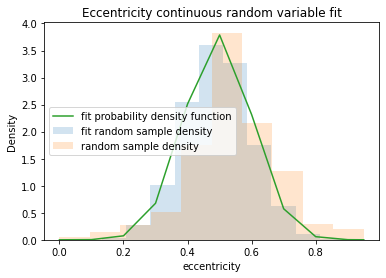

In [35]:
_, ax = plt.subplots()
ax.set_title(r"Eccentricity continuous random variable fit")
ax.hist(fit_sample, density=True, histtype='stepfilled', alpha=0.2, label='fit random sample density')
ax.hist(sample, density=True, histtype='stepfilled', alpha=0.2, label='random sample density')
ax.plot(x, y_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [0, .95]*

In [ ]:
all(v >= 0 and v <= .9 for v in fit_sample)

False